# A Business Decision on Product Selection

 **By:** Fiona Amuda
 
 **Institution:** Gisma University of Applied Sciences
 
 **Course:** AI and Application M504A
 
 **Date:** 24th September 2024

## 1. Business Overview

> ### 1.1 Background
As a data science consultant, my client Village GmbH a wholesale company in Germany has reached out to me to help them analyse a new dataset. Village GmbH business model includes an eCommerce route to market sales channel. This allows them to source products from other online marketplaces from all over the world. After careful consideration they have decided to add beauty products in their sales catalogue.

> ### 1.2 Dataset Description
Village GmbH has acquired a Beauty products dataset, with products from all over the world. They would consider which products to purchase and sale after analysing the data. The file has 14 different features. Product name with a list of products available, the Brands each product belongs to, usage frequency of each product, the market price of each product in USD, some consumer insights like rating and number of reviews, the product size and packaging type, each product skin type recommendation, targeted gender, main ingredient in the product and whether its cruelty free, lasty the country of origin. The sampled data is from 15,000 products.

> ### 1.3 Scope
My scope of work is to complete an exploratory data analysis on the dataset provided. Formulate and document steps taken to clean the dataset. Determine which features are important to use when answering the business questions provided. Resolve the questions and include data visualization. Provide my client with a report and recommendations.



## 2. Exploration of the dataset 

> ### 2.1 Import Libraries
Pandas provides tools to handle data, hence will be used for data analysis and manipulation. NumPy on the other hand is crucial for numerical operations as I will be working with some array and maths functions. For data visualization I will use matplotlib and seaborn to plot and create charts for better data interpretation. Missingno is a visualization tool that makes it easier to identify and handle missing values. For my geographical data i will visualize using Folium.

In [2]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import folium

> ### 2.2 Reading the CSV file
Loading data from CSV file to pandas data frame, making it easier to read and analyse data from a table.

In [3]:
df_products = pd.read_csv('products_beauty.csv')

> ### 2.3 Counting the Rows and Columns in the dataset
By using the .shape attribute i can see the size of the dataset. There 15,000 Rows and 15 Columns.

In [8]:
df_products.shape

(15000, 15)

> ### 2.4 A look at the Columns/feature in the data
The .column attribute returns the names of each column, i can easily see which columns are available for analysis.

In [9]:
#Names of columns in the dataset arranged in a data frame
pd.DataFrame(df_products.columns, columns=['Column Names'])

,Column Names
0,ID
1,Product_Name
2,Brand
3,Category
4,Usage_Frequency
5,Price_USD
6,Rating
7,Number_of_Reviews
8,Product_Size
9,Skin_Type


> ### 2.5 Checking to see if there are any duplicates
Checking for repeated entries in the data frame. For this dataset i do not need to remove any duplicates

In [10]:
df_products.duplicated().sum()

0

> ### 2.6 Data type analysis and description
Checking the data type of each column to help me understand the data better. On this dataset its made up of 3 types (Object, Float and Bool). 

In [11]:
df_products.dtypes

ID                   float64
Product_Name          object
Brand                 object
Category              object
Usage_Frequency       object
Price_USD            float64
Rating               float64
Number_of_Reviews    float64
Product_Size          object
Skin_Type             object
Gender_Target         object
Packaging_Type        object
Main_Ingredient       object
Cruelty_Free            bool
Country_of_Origin     object
dtype: object

> ### 2.7 Describing each data type
Am looking to get a statistical summary of each data type. From Bool we only have one column and false has the most counts. There 10 columns with object data type, i can see the unique count in each column. I can see the highest value and feature in each column. There 4 columns with float data type, i can see the statistical values like mean and max on each column. This helps me understand the distribution of data.

In [12]:
#Describe bool
df_products.describe(include='bool')

,Cruelty_Free
count,15000
unique,2
top,False
freq,7592


In [13]:
#Describe object
df_products.describe(include='object')

,Product_Name,Brand,Category,Usage_Frequency,Product_Size,Skin_Type,Gender_Target,Packaging_Type,Main_Ingredient,Country_of_Origin
count,15000,14986,14994,15000,15000,15000,12990,12291,15000,12985
unique,120,40,24,4,6,5,3,6,7,8
top,Super Setting Spray,Milk Makeup,Serum,Occasional,100ml,Combination,Female,Jar,Retinol,USA
freq,154,426,709,3794,2551,3060,4345,2094,2180,1697


In [14]:
#Describe float
df_products.describe(include='float64')

,ID,Price_USD,Rating,Number_of_Reviews
count,6982.000000,15000.000000,12955.000000,13016.000000
mean,3491.500000,80.134108,2.998804,5014.629687
std,2015.674122,40.402983,1.170229,2858.329091
min,1.000000,10.000000,1.000000,52.000000
25%,1746.250000,45.480000,2.000000,2556.750000
50%,3491.500000,80.040000,3.000000,5005.500000
75%,5236.750000,114.760000,4.000000,7505.000000
max,6982.000000,149.990000,5.000000,10000.000000


> ### 2.8 Observing a sample of 10 rows
Without loading the whole dataset i can sample a subset of the data. From the sample data i can see there missing values, I will analyse the missing values then come up with the best solution to handle the missing values.

In [4]:
df_products.sample(10)

,ID,Product_Name,Brand,Category,Usage_Frequency,Price_USD,Rating,Number_of_Reviews,Product_Size,Skin_Type,Gender_Target,Packaging_Type,Main_Ingredient,Cruelty_Free,Country_of_Origin
2753,2754.0,Super Contour,Make Up For Ever,Foundation,Occasional,71.76,4.2,1400.0,50ml,Sensitive,Male,NaN,Aloe Vera,False,Germany
8076,NaN,Ultra Lip Liner,Shiseido,Face Oil,Monthly,81.25,2.8,8636.0,150ml,Combination,Male,Spray,Glycerin,True,NaN
3748,3749.0,Magic Setting Spray,Bobby Brown,Exfoliator,Daily,10.14,NaN,6976.0,200ml,Combination,Female,Stick,Aloe Vera,True,USA
3185,3186.0,Super Serum,Juvia’s Place,Highlighter,Monthly,51.11,2.6,7183.0,50ml,Normal,Unisex,Compact,Glycerin,True,USA
13527,NaN,Divine Concealer,Kylie Cosmetics,Blush,Occasional,73.84,3.8,7930.0,50ml,Sensitive,Female,Tube,Glycerin,False,UK
5535,5536.0,Perfect Mascara,Danessa Myricks,Lipstick,Monthly,89.46,4.0,6586.0,100ml,Normal,Unisex,Bottle,Salicylic Acid,False,USA
5985,5986.0,Perfect Blush,Patrick Ta,Eyeliner,Weekly,89.89,NaN,864.0,150ml,Oily,Female,Tube,Shea Butter,False,France
14567,NaN,Ultra Eyeliner,Bite Beauty,Contour,Monthly,67.04,5.0,5100.0,50ml,Combination,Female,Bottle,Retinol,False,Australia
2179,2180.0,Magic Setting Spray,Perricone MD,Exfoliator,Weekly,26.82,3.3,8774.0,200ml,Combination,NaN,Stick,Vitamin C,False,Italy
12966,NaN,Ultra Exfoliator,Farsali,Moisturizer,Occasional,96.09,4.2,5677.0,30ml,Combination,Male,Stick,Retinol,False,UK



## 3.0 Analysing missing values
> ### 3.1 Finding the total count of missing values per column
There are 7 complete columns with no missing values. I can see the total sum of the missing values of each of the 8 columns. This helps me understand at a glance which columns have NaN value.

In [16]:
#get the columns with null values
#For each column get the sum 
df_products.isna().sum()

ID                   8018
Product_Name            0
Brand                  14
Category                6
Usage_Frequency         0
Price_USD               0
Rating               2045
Number_of_Reviews    1984
Product_Size            0
Skin_Type               0
Gender_Target        2010
Packaging_Type       2709
Main_Ingredient         0
Cruelty_Free            0
Country_of_Origin    2015
dtype: int64

> ### 3.2 Getting the percentage of missing values on each column
From this analysis i can see ID has more than 50% missing values, i will drop the column. packaging type has 18% missing values i will drop that one too. Brand and category has a few rows of missing values less than 1%, i iwll drop the rows only and not the whole column. I will maintain the rest of the Columns.

In [17]:
#variable with the total count column 
total_missed = df_products.isna().sum()
#variable with the percentage column 
total_percentage = (total_missed/len(df_products))*100
#combining the two columns in a dataframe 
table_total_percentage = pd.DataFrame({'Missing Values': total_missed, 'Percentage': total_percentage})
#Display the dataframe
table_total_percentage

,Missing Values,Percentage
ID,8018,53.453333
Product_Name,0,0.000000
Brand,14,0.093333
Category,6,0.040000
Usage_Frequency,0,0.000000
Price_USD,0,0.000000
Rating,2045,13.633333
Number_of_Reviews,1984,13.226667
Product_Size,0,0.000000
Skin_Type,0,0.000000


> ### 3.3 Visualization of the missing values using msno
On the left side 0 to 1 represents the data completeness, 1 being complete with no missing values. Each bar has the total count at the top, 15,000 representing a complete bar with no missing values. Each bar represents a column with its name at the bottom. On the right there is a scale of 0 to 15000 representing the number of rows.

<Axes: >

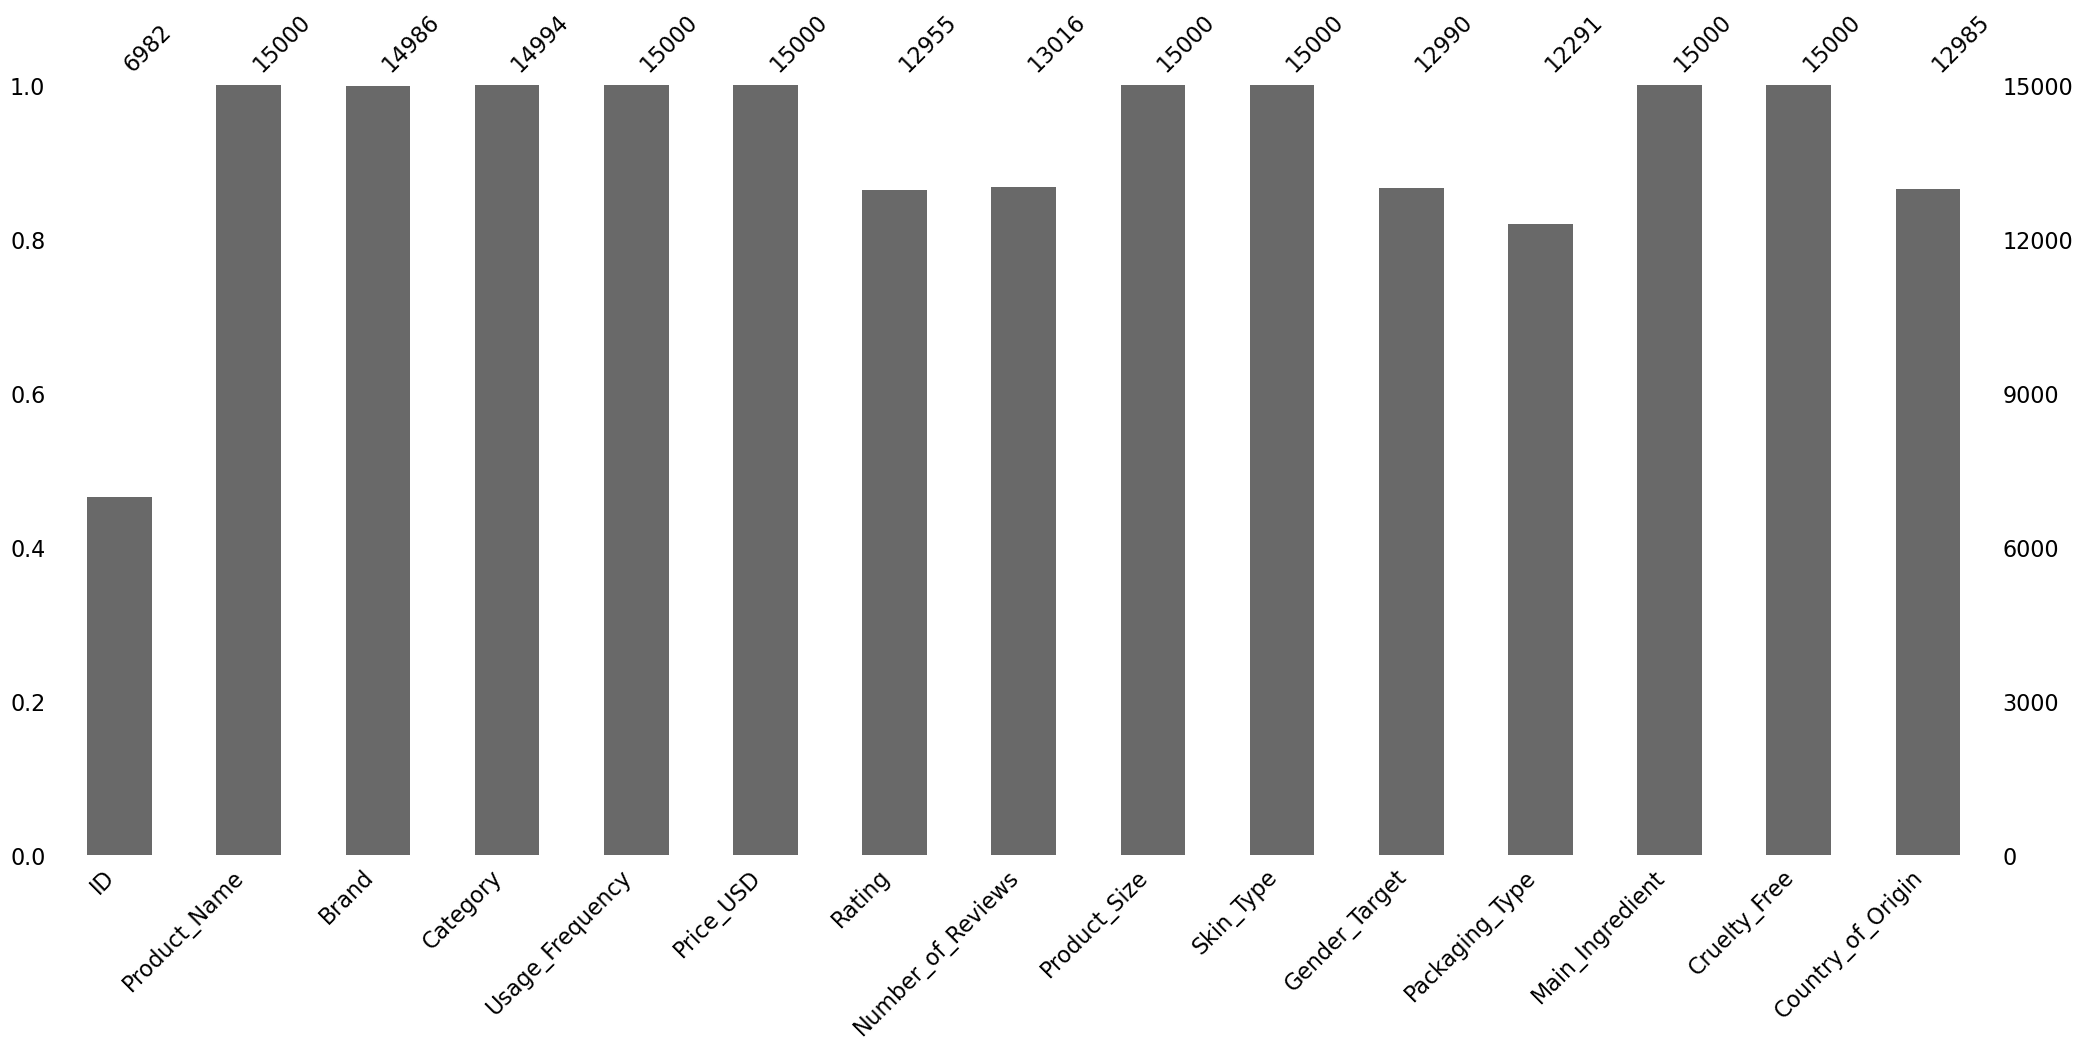

In [18]:
#Display the data frame on a bar chart showing missing values 
msno.bar(df_products)

## 4.0 Metadata
The dataset has 15 columns, 7 of the columns are complete with no missing values. There 15,000 rows of 3 data types; Float, Object and a bool. The key features in this business case are, Price of the products in USD, rating on a scale of 1 to 5, Number of reviews that helps to establish the popularity of the products, product name, brand and category providing product details and country of origin which will help determine where the business should source their products from. There are no duplicates.

## 5. Data Preprocessing
I will remove 2 columns, and 20 rows form the dataset. For the categorical columns with missing values i will fill the NaN with Unknown. The numerical data will require an analysis, i will check the data distribution and based on my domain understanding determine if there is a relationship between the features before imputing. 

> ### 5.1 Dropping Columns ID and Packaging_Type

In [19]:
#Drop the ID column
print('*Before ID Drop')
display(df_products.head())

df_products.drop(columns='ID', inplace=True)

print('*After ID Drop')
display(df_products.head())


*Before ID Drop


,ID,Product_Name,Brand,Category,Usage_Frequency,Price_USD,Rating,Number_of_Reviews,Product_Size,Skin_Type,Gender_Target,Packaging_Type,Main_Ingredient,Cruelty_Free,Country_of_Origin
0,1.0,Ultra Face Mask,Drunk Elephant,Blush,Weekly,67.85,1.4,686.0,30ml,Sensitive,Female,NaN,Retinol,False,Australia
1,2.0,Ultra Lipstick,Laura Mercier,Makeup Remover,Occasional,116.43,4.2,5483.0,250ml,Dry,NaN,Bottle,Shea Butter,False,NaN
2,3.0,Ultra Serum,Natasha Denona,Highlighter,Daily,90.84,1.6,5039.0,100ml,Sensitive,Male,NaN,Aloe Vera,True,Italy
3,4.0,Divine Serum,Ilia Beauty,Face Mask,Occasional,55.17,3.2,6202.0,250ml,Normal,Male,Tube,Glycerin,True,South Korea
4,5.0,Super Foundation,Charlotte Tilbury,Highlighter,Occasional,140.56,NaN,297.0,100ml,Oily,Female,Compact,Glycerin,False,Germany


*After ID Drop


,Product_Name,Brand,Category,Usage_Frequency,Price_USD,Rating,Number_of_Reviews,Product_Size,Skin_Type,Gender_Target,Packaging_Type,Main_Ingredient,Cruelty_Free,Country_of_Origin
0,Ultra Face Mask,Drunk Elephant,Blush,Weekly,67.85,1.4,686.0,30ml,Sensitive,Female,NaN,Retinol,False,Australia
1,Ultra Lipstick,Laura Mercier,Makeup Remover,Occasional,116.43,4.2,5483.0,250ml,Dry,NaN,Bottle,Shea Butter,False,NaN
2,Ultra Serum,Natasha Denona,Highlighter,Daily,90.84,1.6,5039.0,100ml,Sensitive,Male,NaN,Aloe Vera,True,Italy
3,Divine Serum,Ilia Beauty,Face Mask,Occasional,55.17,3.2,6202.0,250ml,Normal,Male,Tube,Glycerin,True,South Korea
4,Super Foundation,Charlotte Tilbury,Highlighter,Occasional,140.56,NaN,297.0,100ml,Oily,Female,Compact,Glycerin,False,Germany


In [21]:
#Drop the Packaging_Type column
print('*Before Packaging_Type Drop')
display(df_products.head())

df_products.drop(columns='Packaging_Type', inplace=True)

print('*After Packaging_Type Drop')
display(df_products.head())

*Before Packaging_Type Drop


,Product_Name,Brand,Category,Usage_Frequency,Price_USD,Rating,Number_of_Reviews,Product_Size,Skin_Type,Gender_Target,Packaging_Type,Main_Ingredient,Cruelty_Free,Country_of_Origin
0,Ultra Face Mask,Drunk Elephant,Blush,Weekly,67.85,1.4,686.0,30ml,Sensitive,Female,NaN,Retinol,False,Australia
1,Ultra Lipstick,Laura Mercier,Makeup Remover,Occasional,116.43,4.2,5483.0,250ml,Dry,NaN,Bottle,Shea Butter,False,NaN
2,Ultra Serum,Natasha Denona,Highlighter,Daily,90.84,1.6,5039.0,100ml,Sensitive,Male,NaN,Aloe Vera,True,Italy
3,Divine Serum,Ilia Beauty,Face Mask,Occasional,55.17,3.2,6202.0,250ml,Normal,Male,Tube,Glycerin,True,South Korea
4,Super Foundation,Charlotte Tilbury,Highlighter,Occasional,140.56,NaN,297.0,100ml,Oily,Female,Compact,Glycerin,False,Germany


*After Packaging_Type Drop


,Product_Name,Brand,Category,Usage_Frequency,Price_USD,Rating,Number_of_Reviews,Product_Size,Skin_Type,Gender_Target,Main_Ingredient,Cruelty_Free,Country_of_Origin
0,Ultra Face Mask,Drunk Elephant,Blush,Weekly,67.85,1.4,686.0,30ml,Sensitive,Female,Retinol,False,Australia
1,Ultra Lipstick,Laura Mercier,Makeup Remover,Occasional,116.43,4.2,5483.0,250ml,Dry,NaN,Shea Butter,False,NaN
2,Ultra Serum,Natasha Denona,Highlighter,Daily,90.84,1.6,5039.0,100ml,Sensitive,Male,Aloe Vera,True,Italy
3,Divine Serum,Ilia Beauty,Face Mask,Occasional,55.17,3.2,6202.0,250ml,Normal,Male,Glycerin,True,South Korea
4,Super Foundation,Charlotte Tilbury,Highlighter,Occasional,140.56,NaN,297.0,100ml,Oily,Female,Glycerin,False,Germany


>### 5.2 Imputing Rating and Number Of Reviews Columns
The missing data is evenly distributed. There is no strong visible pattern. There is no relationship between the features with missing data hence using feature engineering or ML algorithms to predict the missing values is not a viable idea. Using a single value to fill in the missing value on numerical data may cause some biases hence i will generate random values based on the distribution trend of the column and fill the missing values with the random generated numbers.   

<Axes: >

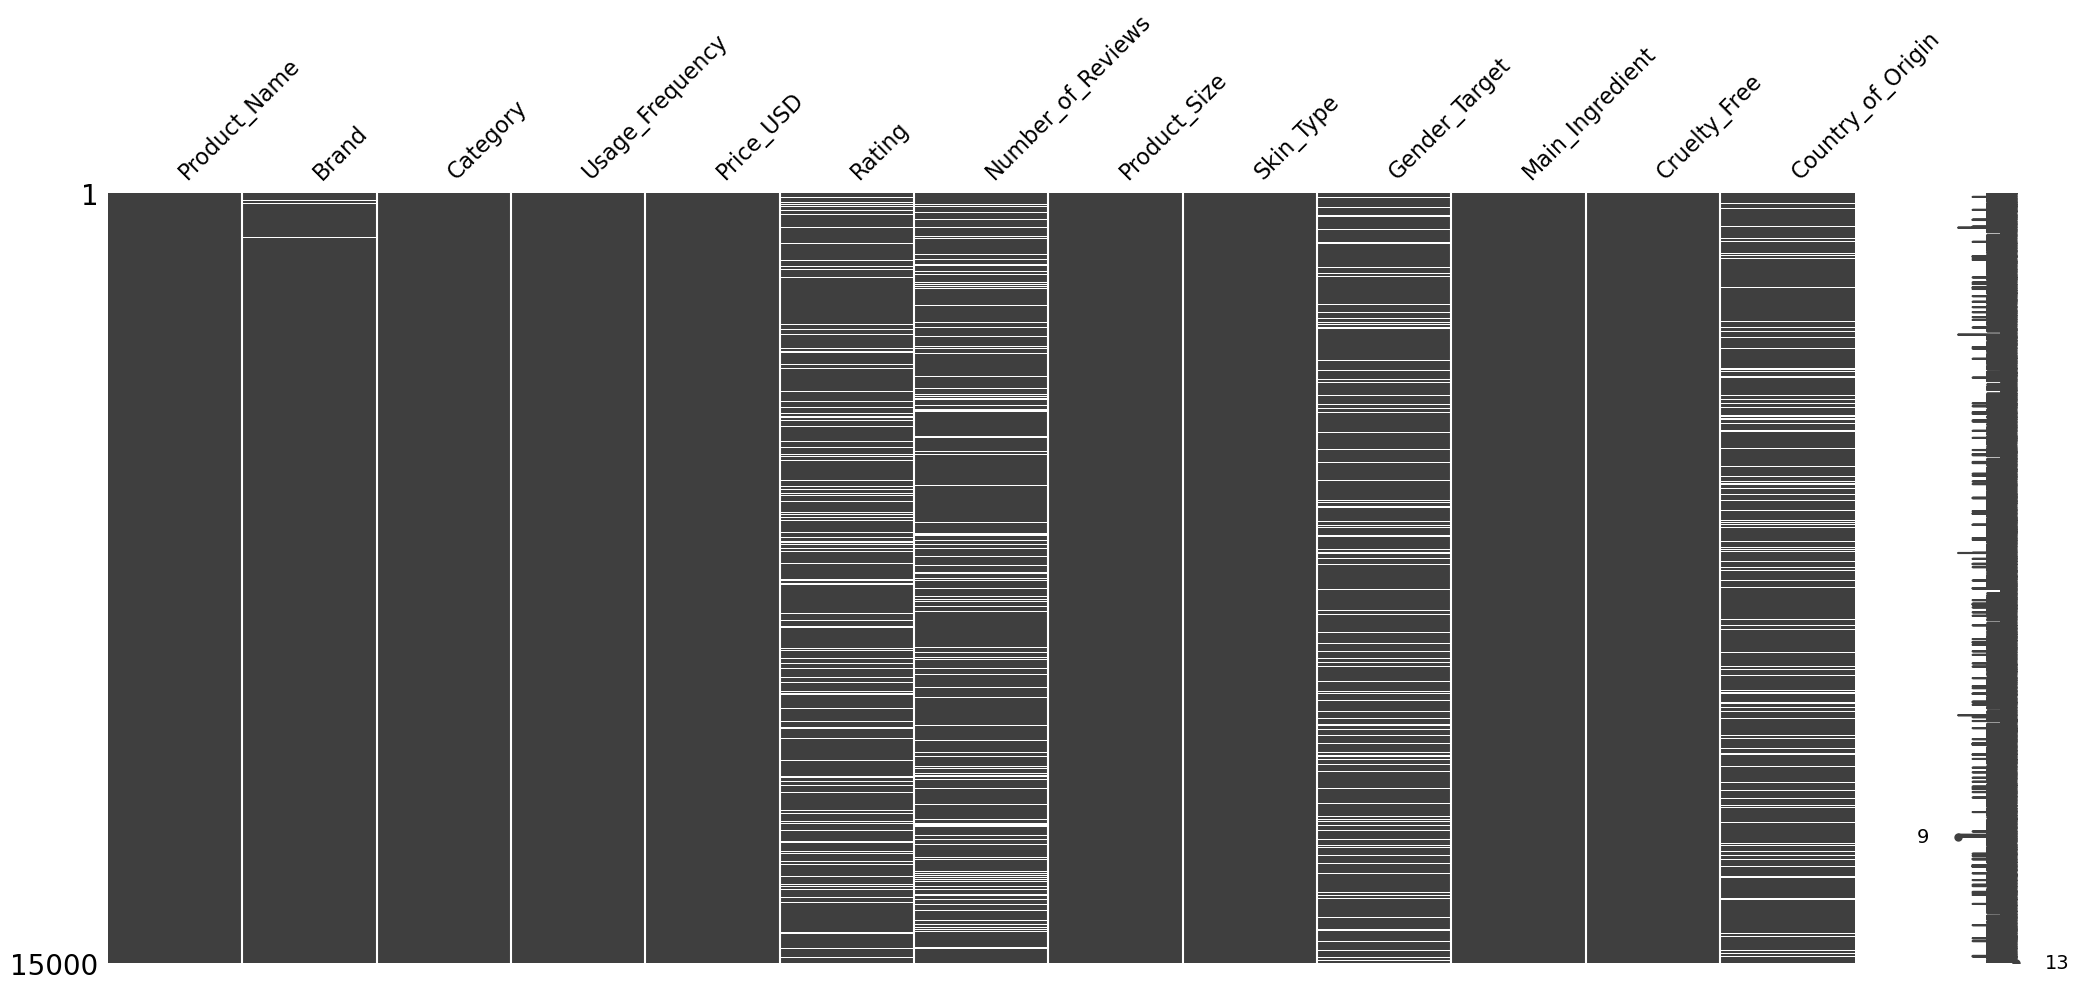

In [22]:
#Cheking the distribution of all missing data 
#Establish if there is a pattern, before replacing NaN values on ratings and number of reviews
#using missingno matrix 

msno.matrix(df_products)

In [27]:
#Distribution portion of current ratings
distribution_rating = df_products['Rating'].value_counts(normalize=True)
print("Rating distribution:\n", distribution_rating)

Rating distribution:
 Rating
1.5    0.028715
4.7    0.026862
1.8    0.026785
2.1    0.026708
4.8    0.026631
4.5    0.026476
4.6    0.026476
4.9    0.026476
2.6    0.026399
4.1    0.026399
4.2    0.026245
3.5    0.025782
1.1    0.025704
4.0    0.025318
1.7    0.025241
1.9    0.025164
2.0    0.025164
1.6    0.025164
1.3    0.025010
3.4    0.025010
2.7    0.025010
2.2    0.024855
1.2    0.024778
4.3    0.024547
3.3    0.024469
2.8    0.024392
1.4    0.024392
2.9    0.024392
3.0    0.024315
2.3    0.024238
3.1    0.023929
3.9    0.023929
3.2    0.023929
2.5    0.023697
4.4    0.023389
2.4    0.022385
3.8    0.022231
3.6    0.021999
3.7    0.021227
5.0    0.013122
1.0    0.013045
Name: proportion, dtype: float64


In [28]:
#Using numpy to generate values based on the distribution portions
#Missing Rating values
missing_data = 2045  
generated_values = np.random.choice(distribution_rating.index,size=missing_data,p=distribution_rating.values)
missing_indices = df_products[df_products['Rating'].isnull()].index

print(f"Number of generated missing ratings: {len(generated_values)}")

#if statemnet to adjust the size of missing data if they do not match 
if len(missing_indices) != len(generated_values):
    generated_values = np.random.choice(distribution_rating.index,size=len(missing_indices),p=distribution_rating.values)

#impute missing data
df_products.loc[missing_indices, 'Rating'] = generated_values

missing_data_after = df_products['Rating'].isnull().sum()
print(f"Missing values after imputation: {missing_data_after}")


Number of generated missing ratings: 2045
Missing values after imputation: 0


In [34]:
#Distribution portion of current Number of Reviews 
distribution_reviews = df_products['Number_of_Reviews'].value_counts(normalize=True)
print("Reviews distribution:\n", distribution_reviews)

#Using numpy to generate values based on the distribution portions
#Missing Reviews values
missing_count = 1984  
generated_count = np.random.choice(distribution_reviews.index,size=missing_count,p=distribution_reviews.values)
missing_value = df_products[df_products['Number_of_Reviews'].isnull()].index

print(f"Number of generated missing reviews: {len(generated_count)}")

#if statemnet to adjust the size of missing data if they do not match 
if len(missing_value) != len(generated_count):
    generated_count = np.random.choice(distribution_reviews.index,size=len(missing_value),p=distribution_reviews.values)

#impute missing data
df_products.loc[missing_value, 'Number_of_Reviews'] = generated_count

missing_count_after = df_products['Number_of_Reviews'].isna().sum()
print(f"Missing values after imputation: {missing_count_after}")

Reviews distribution:
 Number_of_Reviews
2005.0    0.000600
2463.0    0.000600
686.0     0.000533
2061.0    0.000533
9977.0    0.000533
            ...   
5104.0    0.000067
9408.0    0.000067
8429.0    0.000067
2482.0    0.000067
5482.0    0.000067
Name: proportion, Length: 7236, dtype: float64
Number of generated missing reviews: 1984
Missing values after imputation: 0


> ### 5.3 Imputing Gender Target and Country of origin columns with (unknown)
To maintain the original distribution and avoid skewing the results or introducing biases, i will not impute with an already existing feature. I will fill the NaN with Unknown.

In [37]:
#Replacing Gender and country with the string value unknown
df_products['Gender_Target'].fillna('unknown',inplace=True)
df_products['Country_of_Origin'].fillna('unknown',inplace=True)

> ### 5.4 Dropping remaining 20 Rows with missing values
The remaining 20 rows out of 15,000 with missing values under Brand and category column i will remove.

In [39]:
#Droping the Rows with NaN
df_products.dropna(inplace=True)

In [49]:
#After Droping the rows
df_products.isna().sum()

Product_Name         0
Brand                0
Category             0
Usage_Frequency      0
Price_USD            0
Rating               0
Number_of_Reviews    0
Product_Size         0
Skin_Type            0
Gender_Target        0
Main_Ingredient      0
Cruelty_Free         0
Country_of_Origin    0
dtype: int64

In [41]:
#saving the clean file so that i could work on the clean data
df_products.to_csv("products_beauty_clean.csv", index=False)

## 6.0 Business Questions


In [5]:
#Loading the clean dataset
df_products_clean=pd.read_csv("products_beauty_clean.csv")

> ### 6.1 Question 1

**Question:**
Determine 5 brands that have the most SKU(stock keeping unit)

**Why:**
The business would like to stock different variety of beauty products. Given that there several brands offering similar product, the business is looking to put into consideration the 5 Brands that offer the most variety of products.

**How:**
Am using indexing and slicing to get the top 5 brands after running a value count of the products available per brand. Then representing the outcome on a pie chart.

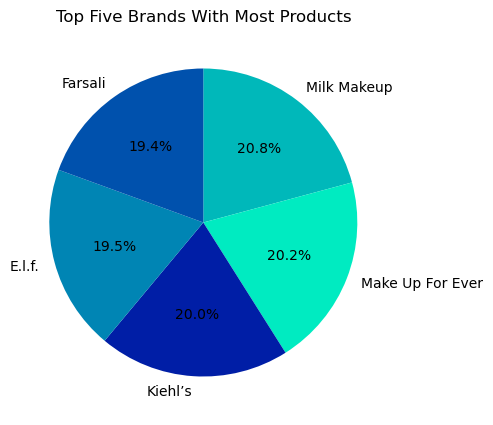

In [18]:
#using count on the brand column to get the total number of products  
brands = df_products_clean['Brand'].value_counts()

#using indexing and slicing to filter and get top 5
brands = (popular_products[:5])

#Add color
colors = ["#00b8ba", "#00ebc1", "#001ea6", "#0085b4", "#0051ad"]

#Ploting the results on a piechart, visual representation 
plt.figure(figsize=(6,5))

#Adding percentages only on the first 5 
brands.plot(kind='pie',autopct='%1.1f%%', startangle=90, counterclock=False, colors=colors)
plt.title('Top Five Brands With Most Products')
plt.ylabel('')
plt.show()

> ### 6.2 Question 2

**Question:**
Determining from which countries the business should stock products

**Why:**
The business has an online market space. They enjoy the flexibility of shipping in products from different countries as orders come in.

**How:** 
Am getting the highly rated products with cost below average, ensuring customer get value for money. Then grouping the outcome by country. Then representing the countries on a world map

**Recommendation:** 
After determining the order of countries with highly rated products and below average pricing, the business should pick the top countries near Germany, stock and have partners from those countries. As per the map its UK, France and Italy. This will ensure products arrive faster to customers.


In [15]:
#Set low price product threshhold to (Below mean value)
#set high rating threshhold to 4
price_mean = df_products_clean['Price_USD'].mean()
product_recommendation = df_products_clean[(df_products_clean['Rating'] > 4) & (df_products_clean['Price_USD'] <= price_mean)]

#Grouping 
country_group = product_recommendation.groupby('Country_of_Origin').size().reset_index(name='Count')
#Sorting
country_sorted = country_group.sort_values(by='Count', ascending=False)
#Out of the 8 countries get the top 4 
print(country_sorted[:5])

  Country_of_Origin  Count
8           unknown    224
3             Italy    219
4             Japan    218
6                UK    209
1            France    208


In [17]:
#Show the countries on map
#Created a dictionaty with the geo co-ordinatesof the countries
#Availabel at https://developers.google.com/public-data/docs/canonical/countries_csv
countries = {
 
    'France': {'lat':46.227638, 'lon':2.213749},
    'Germany': {'lat':51.165691, 'lon':10.451526},
    'Italy': {'lat':41.87194, 'lon':12.56738},
    'Japan': {'lat':36.204824, 'lon':138.252924},
    'UK': {'lat':55.378051, 'lon':-3.435973},

}

#Given map dimentions     
world_map = folium.Map(location=[16, 0], zoom_start=2)

#run a loop and used folium to map the co-ordinates on the map 
for country, coords in countries.items():
    folium.Marker([coords['lat'], coords['lon']], popup=country).add_to(world_map)
    
#load the map
world_map

> ### 6.3 Question 3

**Question:**
Observe the price distribution on cruelty free products

**Why:**
The Business would like to support cruelty free products as part of their social responsibility. They want to understand how price is distributed when it comes to this feature

**How:** 
Plotting a histogram showing bool values on cruelty free, against the price in USD

**Recommendation:** 
The business should support cruelty free initiative, price is evenly distributed


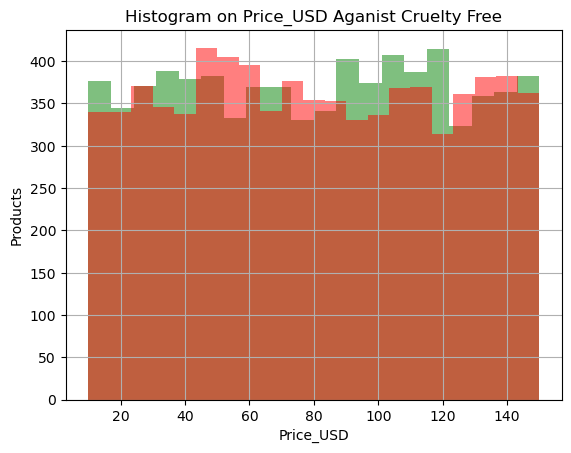

In [22]:
#Ploting the price column on a histogram 
df_products_clean[df_products_clean['Cruelty_Free']==True]['Price_USD'].hist(bins='auto',color='green', alpha=.5)
df_products_clean[df_products_clean['Cruelty_Free']==False]['Price_USD'].hist(bins='auto',color='red', alpha=.5)
plt.title('Histogram on Price_USD Aganist Cruelty Free')
plt.xlabel('Price_USD')
plt.ylabel('Products')

plt.show()

#Conclusion: 
#Beauty products seem to be a nesecity for most people, whether price is low or high consumers still buy
#The business should concider running other marketing campaign that are not driven by price

> ### 6.4 Question 4

**Question:**
What is the correlation between numerical variables

**Why:**
Understand the relationship between Price, Rating and the number of reviews. This will give the business an understanding of whether or not there is a relationship between price and customer satisfaction

**How:** 
Plot a correlation matrix graph

**Recommendation:** 
Price has no strong correlation with rating and number of reviews. Beauty products will be a good addition to the company as its a fast-moving product and is not dependent on price

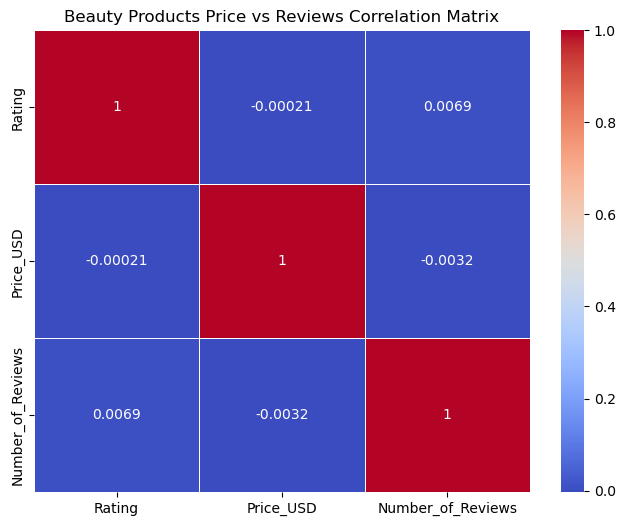

In [25]:
#correlation matrix
price_correlation = df_products_clean[['Rating', 'Price_USD', 'Number_of_Reviews']]
correlation_matrix = price_correlation.corr()

#Plotting the graph
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Beauty Products Price vs Reviews Correlation Matrix')
plt.show()


> ### 6.5 Question 5

**Question:**
Observe the distribution of reviews and price groups

**Why:**
Determine if highly priced products are more popular. This will help the business make a decision on which products to stock

**How:** 
Divide the prices into 4 classes, budget, mid-range, premium and Luxury products. Compare the 4 classes against the reviews

**Recommendation:** 
Budget products had the least reviews but were not far off from the rest of the groups. The popularity is evenly distributed


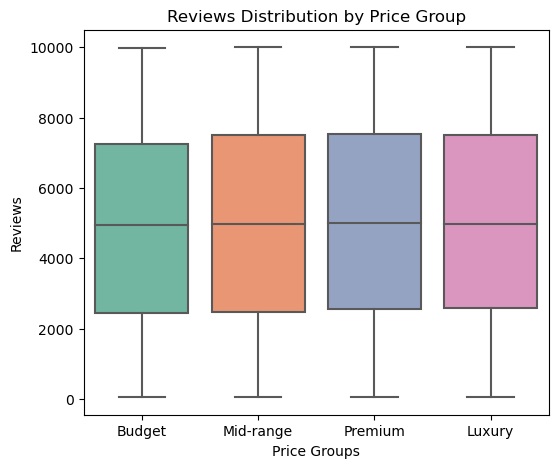

In [34]:
df_products_clean['Price_Groups'] = pd.cut(df_products_clean['Price_USD'], 
bins=[0, 20, 50, 100, 500], labels=['Budget', 'Mid-range', 'Premium', 'Luxury'])
plt.figure(figsize=(6, 5))
sns.boxplot(x='Price_Groups', y='Number_of_Reviews', data=df_products_clean, palette='Set2')
plt.title('Reviews Distribution by Price Group')
plt.xlabel('Price Groups')
plt.ylabel('Reviews')
plt.show()

## 7. Conclusion
The Business would benefit greatly by adding Beauty products to their list of online offerings. The biggest advantage of selling these products is the fact that its not directly influenced by pricing. The products would sale under any price group. The Business has the flexibility to explore and stock any range of products, but its crucial for them to stock products that are highly rated to maintain customer loyalty. Its a good choice for the business to stock brands that have the most SKU and offer value for money. The Business geographic position is an advantage to them as they are neighbours with three of the countries with highly rated products that are budget friendly. This will not only help them retain customers looking to get value for money but also improve delivery time in the event they need to restock from the neighbouring countries. 
In general, the beauty products are in demand, the Business should definitely add this to their online stores.

## 8. Refrence

https://www.kaggle.com/datasets/waqi786/most-used-beauty-cosmetics-products-in-the-world/data